# **Analysis of Marvel Superhero Network**

---
<img src = "https://cdn.wallpapersafari.com/90/36/k9MUW8.png" width = 1200 height = 400 title="Marvel">

> Paper Citation : [How the Avengers Assembled? Analysis of Marvel Hero Social Network](https://arxiv.org/abs/2109.12900)



> Authors : Chongyang Shi, Xuan Yu, Ziyang Ren



**Paper Abstract :** <br>
> The movies of Marvel universe are very popular among young people. Almost every young people nowadays know some of the heroes in Marvel universe, such as iron man and spider man. The data set named The Marvel Universe Social Network (MUSN) describe the social relationships of the heroes. By analyzing the MUSN, we establish a social network of Marvel heroes. We derive some basic statistics from the Marvel network, such as the number of nodes and links, the hubs, the components, the shortest path lengths and the diameter. In the next part, we analyze the structure of the Marvel network and obtain some results of the connectedness, the clustering, the degree distribution, the degree correlation. Meanwhile, we fit the power law and divide the network into different communities. In this process, we not only find that the network appears to have the small world nature, since it is obviously a scale-free network, but also find that it is very similar to the real-world social network. Further, based on the work of Loverkar et al., we do a hypothesis test on the small world nature of the network. We find that the Marvel network does have small world property. In the end, we visualize the Marvel network to give a better understanding of the network.






## **Data Set**



> Kaggle Link : [Marvel Universe Social Network](https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network/discussion/44246)


> The Marvel Universe Social Network - An artificial social network of heroes


> Creator : CLAUDIO SANHUEZA





### ***Setting up Kaggle API for Downloading Dataset***

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download csanhueza/the-marvel-universe-social-network
! unzip the-marvel-universe-social-network

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 45.4MB/s]
Archive:  the-marvel-universe-social-network.zip
  inflating: edges.csv               
  inflating: hero-network.csv        
  inflating: nodes.csv               


## Generating the Graph

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nodes = pd.read_csv("nodes.csv")
hero_comic_edges = pd.read_csv("edges.csv")
hero_hero_edges = pd.read_csv("hero-network.csv")

In [ ]:
nodes.columns,hero_comic_edges.columns,hero_hero_edges.columns

(Index(['node', 'type'], dtype='object'),
 Index(['hero', 'comic'], dtype='object'),
 Index(['hero1', 'hero2'], dtype='object'))

## Basic Statistics






> ### **Average Degree**



In [ ]:
marvel_avg_degree = sum([v for (k,v) in list(heros.degree())])/len(list(heros.degree()))
print(f"Average Degree of a node in the Marvel heroes network = {marvel_avg_degree}")

Average Degree of a node in the Marvel heroes network = 52.04077186430128




> ### **Hubs**



In [ ]:
print("Printing nodes with degree greater than or equal to 1000.")
[(i,j) for (i,j) in sorted(list(heros.degree()),key = lambda x : x[1],reverse = True) if j >= 1000]

Printing nodes with degree greater than or equal to 1000.


[('CAPTAIN AMERICA', 1906),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267),
 ('VISION ', 1241),
 ('INVISIBLE WOMAN/SUE ', 1236),
 ('HAWK', 1175),
 ('WASP/JANET VAN DYNE ', 1091),
 ('ANT-MAN/DR. HENRY J.', 1082),
 ('CYCLOPS/SCOTT SUMMER', 1081),
 ('ANGEL/WARREN KENNETH', 1073),
 ('STORM/ORORO MUNROE S', 1072),
 ('SHE-HULK/JENNIFER WA', 1071),
 ('DR. STRANGE/STEPHEN ', 1067),
 ('HULK/DR. ROBERT BRUC', 1055),
 ('WONDER MAN/SIMON WIL', 1033),
 ('PROFESSOR X/CHARLES ', 1032),
 ('COLOSSUS II/PETER RA', 1025),
 ('MARVEL GIRL/JEAN GRE', 1005)]


<img src = "https://static.wikia.nocookie.net/marveldatabase/images/b/b1/Captain_America_Vol_6_2_Textless.jpg/revision/latest/scale-to-width-down/329?cb=20110719042719" width = 200 height = 400 title="Captain America">
<img src = "https://upload.wikimedia.org/wikipedia/en/2/21/Web_of_Spider-Man_Vol_1_129-1.png" width = 200 height = 400 title="Spiderman">
<img src = "https://upload.wikimedia.org/wikipedia/en/4/47/Iron_Man_%28circa_2018%29.png" width = 200 height = 400 title="Iron Man">
<img src = "https://upload.wikimedia.org/wikipedia/en/2/28/Thing_Dark_Reign_Fantastic_Four.png" width = 200 height = 400 title="Ben Grimm | Fantastic Four">
<img src = "https://upload.wikimedia.org/wikipedia/en/b/ba/Reedr.jpg" width = 200 height = 400 title="Reed Richards | Fantastic Four">



> ### **Component**



In [ ]:
marvel_cc = sorted(nx.connected_components(heros), key=len,reverse = True)
print(f"Number of Connected Components = {len(marvel_cc)}")

Number of Connected Components = 4


In [ ]:
print(f"Largest Connected component = {nx.info(heros.subgraph(list(marvel_cc[0])))}")
print(f"Second Largest Connected component = {nx.info(heros.subgraph(list(marvel_cc[1])))}")
print(f"Third Largest Connected component = {nx.info(heros.subgraph(list(marvel_cc[2])))}")
print(f"Fourth Largest Connected component = {nx.info(heros.subgraph(list(marvel_cc[3])))}")

Largest Connected component = Graph with 6408 nodes and 167151 edges
Second Largest Connected component = Graph with 9 nodes and 34 edges
Third Largest Connected component = Graph with 7 nodes and 21 edges
Fourth Largest Connected component = Graph with 2 nodes and 1 edges


### **Centrality Measures**



> #### **Degree Centrality**



In [ ]:
sorted([(k, v) for k, v in nx.degree_centrality(heros).items()],key = lambda x : x[1],reverse = True)[:10]

[('CAPTAIN AMERICA', 0.2966536964980545),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254),
 ('WOLVERINE/LOGAN ', 0.21338521400778213),
 ('HUMAN TORCH/JOHNNY S', 0.21182879377431907),
 ('SCARLET WITCH/WANDA ', 0.20622568093385216),
 ('THOR/DR. DONALD BLAK', 0.20062256809338522),
 ('BEAST/HENRY &HANK& P', 0.19719844357976654)]



> #### **Closeness Centrality**



In [ ]:
sorted([(k, v) for k, v in nx.closeness_centrality(heros).items()],key = lambda x : x[1],reverse = True)[:10]

[('CAPTAIN AMERICA', 0.583688144346388),
 ('SPIDER-MAN/PETER PAR', 0.5740902532137266),
 ('IRON MAN/TONY STARK ', 0.5614279813721937),
 ('THING/BENJAMIN J. GR', 0.5577521106953788),
 ('MR. FANTASTIC/REED R', 0.556053126894305),
 ('WOLVERINE/LOGAN ', 0.5548940792092725),
 ('HUMAN TORCH/JOHNNY S', 0.5548458904051726),
 ('SCARLET WITCH/WANDA ', 0.5523038060179429),
 ('THOR/DR. DONALD BLAK', 0.5508751877923405),
 ('BEAST/HENRY &HANK& P', 0.5491233715526914)]



> ### **Diameter**



In [ ]:
nx.approximation.diameter(heros.subgraph(list(marvel_cc[0])))

5



> ### **Connectedness using Transitivity**



In [ ]:
print(f"Approximate Transitivity = {nx.transitivity(heros.subgraph(list(marvel_cc[0])))}")

Approximate Transitivity = 0.19453467386750134




> ### **Clustering Coefficients**



In [ ]:
hero_cc = []
for i in zip([(k,v) for (k,v) in nx.clustering(heros).items()],[(k,v) for (k,v) in nx.degree(heros)]):
  hero_cc.append((i[0][0],i[0][1],i[1][1]))
sorted(hero_cc,key = lambda x : x[2],reverse = True)[:10]

[('CAPTAIN AMERICA', 0.0489946101962858, 1906),
 ('SPIDER-MAN/PETER PAR', 0.04884606915360718, 1737),
 ('IRON MAN/TONY STARK ', 0.062000153782221915, 1522),
 ('THING/BENJAMIN J. GR', 0.06899842287037591, 1416),
 ('MR. FANTASTIC/REED R', 0.07175747344313574, 1379),
 ('WOLVERINE/LOGAN ', 0.07317584798777599, 1371),
 ('HUMAN TORCH/JOHNNY S', 0.0720923196611488, 1361),
 ('SCARLET WITCH/WANDA ', 0.07880864162343955, 1325),
 ('THOR/DR. DONALD BLAK', 0.07801319333683485, 1289),
 ('BEAST/HENRY &HANK& P', 0.08011486126748885, 1267)]



> #### **Plotting Clustering Coefficient of nodes against its degree.**







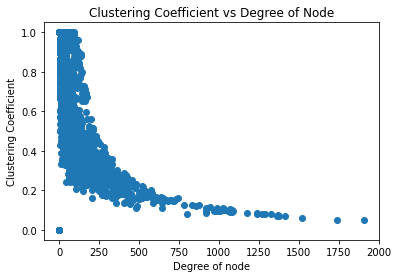

In [ ]:
plt.scatter([i[2] for i in hero_cc],[i[1] for i in hero_cc])
plt.xlabel("Degree of node")
plt.ylabel("Clustering Coefficient")
plt.title("Clustering Coefficient vs Degree of Node")
plt.show()



> ### **Degree Distribution**



In [ ]:
def get_pmf_k(x,l):
  c = 0
  for i in l:
    if i == x:
      c += 1
  return c/len(l)
degree = [i[2] for i in hero_cc]
pmf_k = list(set([(i,get_pmf_k(i,degree)) for i in degree]))

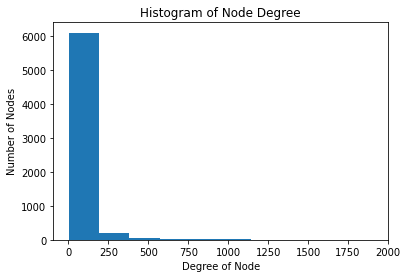

In [ ]:
hist = plt.hist([i[2] for i in hero_cc])
(n,bins,_) = hist
plt.ylabel("Number of Nodes")
plt.xlabel("Degree of Node")
plt.title("Histogram of Node Degree")
plt.show()

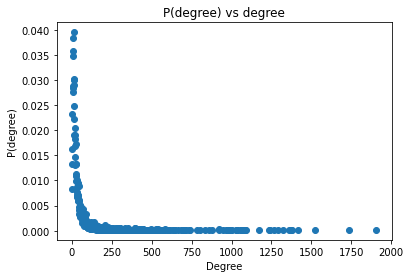

In [ ]:
plt.scatter([i[0] for i in pmf_k],[i[1] for i in pmf_k])
plt.title("P(degree) vs degree")
plt.xlabel("Degree")
plt.ylabel("P(degree)")
plt.show()

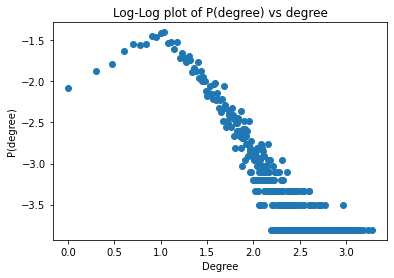

In [ ]:
plt.scatter([np.log10(i[0]) for i in pmf_k],[np.log10(i[1]) for i in pmf_k])
plt.title("Log-Log plot of P(degree) vs degree")
plt.xlabel("Degree")
plt.ylabel("P(degree)")
plt.show()

In [ ]:
def get_rcdf(x,l):
  c = 0
  for i in l:
    if i[0] >= x:
      c += i[1]
  return c
rcdf_k = [(i[0],get_rcdf(i[0],pmf_k)) for i in pmf_k]

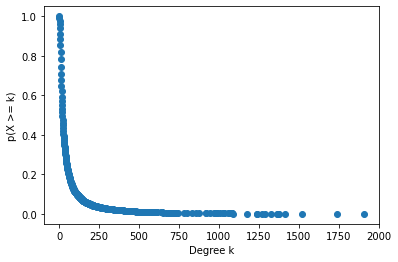

In [ ]:
plt.scatter([i[0] for i in rcdf_k],[i[1] for i in rcdf_k])
plt.xlabel('Degree k')
plt.ylabel('p(X >= k)')
plt.show()

### **Fitting the Power Law to check for Scale-Free Network Property**

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*np.power(x,b)
trcdf_k = [i for i in rcdf_k if i[0] > 110]
popt, pcov = curve_fit(func, np.log10(np.array([i[0] for i in trcdf_k])), np.log10(np.array([i[1] for i in trcdf_k])))
popt

array([-0.16112609,  2.51199502])

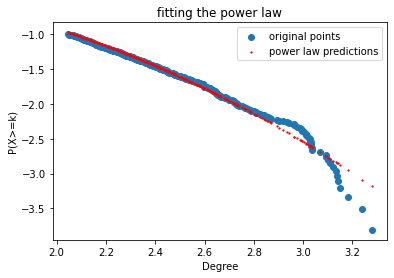

In [ ]:
plt.scatter(np.log10(np.array([i[0] for i in trcdf_k])),np.log10(np.array([i[1] for i in trcdf_k])))
plt.scatter(np.log10(np.array([i[0] for i in trcdf_k])),[func(i,*popt) for i in [np.log10(i[0]) for i in trcdf_k]],c = 'r',s=1.5)
plt.legend(['original points','power law predictions'])
plt.xlabel('Degree')
plt.ylabel('P(X>=k)')
plt.title("fitting the power law")
plt.show()

We see that there are many properties that the marvel network shows which are commonly observed in scale free networks:<br>


*   the relative commonness of vertices with a degree that greatly exceeds the average, we called these heroes as hubs.
*   the clustering coefficient distribution which decreases as the node degree increases.
*   P(X>=k) observes the power-law with gamma = 2.511
*   log-log plot of P(k) vs degree is typical of scale free networks





### **Community**

In [ ]:
communities = nx.community.greedy_modularity_communities(heros)
len(communities)

67



> #### **Modularity**



In [ ]:
nx.community.modularity(heros,communities)

0.35956294124764426

### **Degree Correlation**

In [ ]:
nx.degree_pearson_correlation_coefficient(heros)

-0.16196840096977116

Further after degree preserving randomization is done and the new degree correlation is calculated, which is nearly the same as the value above, the author concludes that the Marvel network is structural disassortative, that means hubs tend to connect to small nodes. Hence, the superheroes tend to focus more on helping the smaller heroes.

### **K-Core**

In [ ]:
main_core = nx.k_core(heros,5)
main_core.size()

166115

## **Similarity to Real-Life Collaboration Networks**

Collaboration networks studied so far present the similar basic features including:<br>


1. On average, every pair of nodes can be connected through a short path
within the network.
2. The probability that two nodes are linked is greater if they share a neighbor (High Clustering Coefficient).
3. The fraction of nodes with k neighbors decays roughly as a function of the form k^(−τ) for some positive exponent τ , with perhaps a cutoff for large values of k.
<br>
Points 1 and 2 indicate the small world property, while point 3 indicate scale free property. We have already shown the scale free property's existence in this network.


In [ ]:
dist = 0
for i in list(heros.subgraph(list(marvel_cc[0])).nodes):
  dist += np.average([i for i in nx.shortest_path_length(heros.subgraph(list(marvel_cc[0])),source = i).values()])
dist = dist/len(list(heros.subgraph(list(marvel_cc[0])).nodes))

print(f"Average shortest path length : {dist}")
print("Average Clustering Coefficient : ",np.average([v for (k,v) in nx.clustering(heros).items()]))
print("Power law fit yields τ value of : ",popt[1]," which is positive and lying in the range (2,3) as is typically observed in scale free network.")

Average shortest path length : 2.6380194817339673
Average Clustering Coefficient :  0.7746541217110611
Power law fit yields τ value of :  2.511995021758316  which is positive and lying in the range (2,3) as is typically observed in scale free network.


The Marvel Network also has a very good clustering coefficient at 0.775 which is several magnitudes higher than a random network with same number of nodes and edges (0.008). Also the average shortest path is 2.64 which is low as well. Hence our network is quite close to real world collaboration networks.



## **Predicting Phase 4 in the MCU**


> #### Characters introduced upto phase 3. How did they assemble?



In [ ]:
phase3_main = ['HULK III/BRUCE BANNE','HAWK','BUCKY/BUCKY BARNES','BINARY/CAROL DANVERS','DRAX/ARTHUR DOUGLAS','FURY, COL. NICHOLAS ',
                  'ANT-MAN II/SCOTT HAR','SPIDER-MAN/PETER PAR','POTTS, VIRGINIA PEPP','ROCKET RACCOON','CAPTAIN AMERICA',
                 'DR. STRANGE/STEPHEN ',"COAL TIGER/T'CHALLA ",'THOR/DR. DONALD BLAK','WASP/JANET VAN DYNE ','FALCON/SAM WILSON',
                 'CARTER, PEGGY','ODIN [ASGARDIAN]','HEIMDALL [ASGARDIAN]',
                 'GAMORA','VISION ','BLACK WIDOW/NATASHA ','IRON MAN/TONY STARK ','THANOS','WHIPLASH II/','WHIPLASH/MARK SCARLO','RONAN THE ACCUSER [K','ULTRON','EGO',
               'HELA [ASGARDIAN]','SURTUR','KLAW/ULYSSES KLAW',"KILLMONGER, ERIC/N'J",'LOKI [ASGARDIAN]','MYSTERIO/QUENTIN BEC','MALEKITH/MALCOLM KEI','ABOMINATION/EMIL BLO',
               'DORMAMMU','STANE, OBADIAH','RED SKULL/JOHANN SCH']

phase3_main_vil = ['BUCKY/BUCKY BARNES','THANOS','WHIPLASH II/','WHIPLASH/MARK SCARLO','RONAN THE ACCUSER [K','ULTRON','EGO',
               'HELA [ASGARDIAN]','SURTUR','KLAW/ULYSSES KLAW',"KILLMONGER, ERIC/N'J",'LOKI [ASGARDIAN]','MYSTERIO/QUENTIN BEC','MALEKITH/MALCOLM KEI','ABOMINATION/EMIL BLO',
               'DORMAMMU','STANE, OBADIAH','RED SKULL/JOHANN SCH']

phase3_side = ['OKOYE','ZEMO/BARON HEINRICH ','VULTURE/ADRIAN TOOME','NEBULA','SCARLET WITCH/WANDA ','QUICKSILVER/PIETRO M','WAR MACHINE II/PARNE','VALKYRIE IV','EXECUTIONER II/SKURG',
               'ARON [WATCHER]','OSBORN, LIZ ALLAN','LIZARD/DR. CURTIS CO','ELECTRO/MAX DILLON' ,'FANDRAL [ASGARDIAN]',
               'KINGPIN/WILSON FISK','HAMMER, JUSTIN','PIERCE, ALEXANDER GO','GRANDMASTER/EN DWI G','ANCIENT ONE','KILLIAN','TASKMASTER','FRIGGA','HARKNESS, AGATHA',
               'HOGAN, HAROLD J. HAP','HOGUN [ASGARDIAN]','WATSON-PARKER, MARY ',
                   'LEEDS, NED','SANDMAN/WILLIAM BAKE',"MAN-APE/M'BAKU",'BARON MORDO/KARL MOR','MALICE V/NAKIA',
                   'GREEN GOBLIN/NORMAN ','RAMONDA','SIF','SPRITE','GHOST','TALOS','THOMPSON, EUGENE FLA',
                   'COLLECTOR/TANELEER T','VOLSTAGG','USAGENT/CAPTAIN JOHN','WOO, JIMMY','ZOLA, ARNIM','YONDU/YONDU UDONTA']

phase4_main = ['SCARLET WITCH/WANDA ','VENOM/EDDIE BROCK','BLACK WIDOW II/YELEN','SERSI/SYLVIA','SHANG-CHI','MOON KNIGHT/MARC SPE',
                   'DRUIG','KINGO SUNEN [ETERNAL','DR. OCTOPUS/OTTO OCT','PHASTOS [ETERNAL]','THENA',
                   'ARISHEM [CELESTIAL]','MAKKARI/MIKE KHARY/I',"COAL TIGER/T'CHALLA ",'SPIDER-MAN/PETER PAR','VALKYRIE IV',
                   'WONG','BUCKY/BUCKY BARNES','FALCON/SAM WILSON','THOR/DR. DONALD BLAK','SHE-HULK/JENNIFER WA','HAWK','DR. STRANGE/STEPHEN ','RAZORBLADE/','SPRITE',
               'DRAX/ARTHUR DOUGLAS','ROCKET RACCOON','NEBULA','FURY, COL. NICHOLAS ','WASP/JANET VAN DYNE ','ANT-MAN II/SCOTT HAR']

phase4_side = ['ECHO/MAYA LOPEZ','CLOWN/CRAFTY ELIOT F','MS. MARVEL II/SHARON','HOGAN, HAROLD J. HAP','HULK III/BRUCE BANNE','TALOS','BARON MORDO/KARL MOR','ZEUS','OKOYE',
               "MAN-APE/M'BAKU",'MALICE V/NAKIA']

dead_characters = ['WHIPLASH II/','WHIPLASH/MARK SCARLO','STANE, OBADIAH','KILLIAN','FRIGGA','KURSE/ALGRIM [ASGARD','MALEKITH/MALCOLM KEI',
                   'SITWELL, JASPER','PIERCE, ALEXANDER GO','RONAN THE ACCUSER [K','WOLFGANG','QUICKSILVER/PIETRO M','ULTRON','CROSSBONES/BROCK BIN',
                   'CARTER, PEGGY',"T'CHAKA",'ANCIENT ONE','EGO','YONDU/YONDU UDONTA','ODIN [ASGARDIAN]','EXECUTIONER II/SKURG','HELA [ASGARDIAN]',
                   'SURTUR','KLAW/ULYSSES KLAW','ZURI',"KILLMONGER, ERIC/N'J",'HEIMDALL [ASGARDIAN]','LOKI [ASGARDIAN]','GAMORA','VISION ','BLACK WIDOW/NATASHA ',
                   'THANOS','IRON MAN/TONY STARK ','MYSTERIO/QUENTIN BEC','BATTLESTAR/LEMAR HOS','FLAG-SMASHER','AJAK/TECUMOTZIN [ETE','KRO [DEVIANT]',
                   'IKARIS/IKE HARRIS [E','STARK, HOWARD','STARK, MARIA CARBONE']

### Assessing the characters upto Phase 3






>  #### The Main Characters.



In [ ]:
phase3_all = phase3_main + phase3_side
cc_main_h = sorted(nx.connected_components(heros.subgraph(phase3_all)), key=len,reverse = True)
phase3_paths = []
for i in cc_main_h[0]:
  curr = i
  temp = []
  for j in cc_main_h[0]:
    if i != j:
      sh = nx.shortest_path_length(heros.subgraph(cc_main_h[0]),i,j)
      temp.append((j,sh))
  phase3_paths.append((i,temp))

In [ ]:
main_deg3 = heros.subgraph(phase3_all).degree(phase3_main)
deg3 = [v for (k,v) in main_deg3]

deg_cent3 = nx.degree_centrality(heros.subgraph(phase3_all))
degcent3 = [v for (k,v) in list(deg_cent3.items()) if k in phase3_main]

clo_cent3 = nx.closeness_centrality(heros.subgraph(phase3_all))
clocent3 = [v for (k,v) in list(clo_cent3.items()) if k in phase3_main]

print(f"Mean degree of Main Characters upto Phase 3 is {np.average(deg3)}")
print(f"Median degree of Main Characters upto Phase 3 is {np.median(deg3)}")
print('---------------------------------------------------------------------')
print(f"Mean degree centrality of Main Characters upto Phae 3 is {np.average(degcent3)}")
print(f"Median degree centrality of Main Characters upto Phae 3 is {np.median(degcent3)}")
print('---------------------------------------------------------------------')
print(f"Mean closeness centrality of Main Characters upto Phae 3 is {np.average(clocent3)}")
print(f"Median closeness centrality of Main Characters upto Phae 3 is {np.median(clocent3)}")
print('---------------------------------------------------------------------')

Mean degree of Main Characters upto Phase 3 is 30.95
Median degree of Main Characters upto Phase 3 is 26.5
---------------------------------------------------------------------
Mean degree centrality of Main Characters upto Phae 3 is 0.37289156626506026
Median degree centrality of Main Characters upto Phae 3 is 0.31927710843373497
---------------------------------------------------------------------
Mean closeness centrality of Main Characters upto Phae 3 is 0.5786205784479008
Median closeness centrality of Main Characters upto Phae 3 is 0.5661084222385726
---------------------------------------------------------------------




> #### The Side Characters



In [ ]:
side_deg3 = heros.subgraph(phase3_all).degree(phase3_side)
deg3 = [v for (k,v) in side_deg3]

deg_cent3 = nx.degree_centrality(heros.subgraph(phase3_all))
degcent3 = [v for (k,v) in list(deg_cent3.items()) if k in phase3_side]

clo_cent3 = nx.closeness_centrality(heros.subgraph(phase3_all))
clocent3 = [v for (k,v) in list(clo_cent3.items()) if k in phase3_side]

print(f"Mean degree of side Characters upto Phase 3 is {np.average(deg3)}")
print(f"Median degree of side Characters upto Phase 3 is {np.median(deg3)}")
print('---------------------------------------------------------------------')
print(f"Mean degree centrality of side Characters upto Phae 3 is {np.average(degcent3)}")
print(f"Median degree centrality of side Characters upto Phae 3 is {np.median(degcent3)}")
print('---------------------------------------------------------------------')
print(f"Mean closeness centrality of side Characters upto Phae 3 is {np.average(clocent3)}")
print(f"Median closeness centrality of side Characters upto Phae 3 is {np.median(clocent3)}")
print('---------------------------------------------------------------------')

Mean degree of side Characters upto Phase 3 is 21.318181818181817
Median degree of side Characters upto Phase 3 is 20.0
---------------------------------------------------------------------
Mean degree centrality of side Characters upto Phae 3 is 0.2568455640744798
Median degree centrality of side Characters upto Phae 3 is 0.24096385542168675
---------------------------------------------------------------------
Mean closeness centrality of side Characters upto Phae 3 is 0.5136169131421561
Median closeness centrality of side Characters upto Phae 3 is 0.535073799032447
---------------------------------------------------------------------




> Phase 4 Main Characters



In [ ]:
main_deg3 = heros.subgraph(phase3_all).degree(phase4_main)
deg3 = [v for (k,v) in main_deg3]

deg_cent3 = nx.degree_centrality(heros.subgraph(phase4_main))
degcent3 = [v for (k,v) in list(deg_cent3.items()) if k in phase4_main]

clo_cent3 = nx.closeness_centrality(heros.subgraph(phase4_main))
clocent3 = [v for (k,v) in list(clo_cent3.items()) if k in phase4_main]

print(f"Mean degree of Main Characters in Phase4 is {np.average(deg3)}")
print(f"Median degree of Main Characters in Phase4 is {np.median(deg3)}")
print('---------------------------------------------------------------------')
print(f"Mean degree centrality of Main Characters in Phase4 is {np.average(degcent3)}")
print(f"Median degree centrality of Main Characters in Phase4 is {np.median(degcent3)}")
print('---------------------------------------------------------------------')
print(f"Mean closeness centrality of Main Characters in Phase4 is {np.average(clocent3)}")
print(f"Median closeness centrality of Main Characters in Phase4 is {np.median(clocent3)}")
print('---------------------------------------------------------------------')

Mean degree of Main Characters in Phase4 is 37.0625
Median degree of Main Characters in Phase4 is 37.0
---------------------------------------------------------------------
Mean degree centrality of Main Characters in Phase4 is 0.43655913978494626
Median degree centrality of Main Characters in Phase4 is 0.43333333333333335
---------------------------------------------------------------------
Mean closeness centrality of Main Characters in Phase4 is 0.6380016446897285
Median closeness centrality of Main Characters in Phase4 is 0.625
---------------------------------------------------------------------


In [ ]:
len(cc_main_h[0]),len(cc_main_h[1]),len(cc_main_h[2]),len(cc_main_h[3]),len(cc_main_h[4]),len(cc_main_h[5])

(79, 1, 1, 1, 1, 1)

In [ ]:
cc_main_h[1],cc_main_h[2],cc_main_h[3],cc_main_h[4],cc_main_h[5]

({'POTTS, VIRGINIA PEPP'},
 {'KILLIAN'},
 {'TALOS'},
 {'YONDU/YONDU UDONTA'},
 {'ROCKET RACCOON'})

In [ ]:
path_lengths = []
for i in phase3_paths:
  temp = []
  for j in i[1]:
    temp.append(j[1])
  path_lengths.append((i[0],temp))

In [ ]:
np.min([np.average(i[1]) for i in path_lengths]),np.average([np.average(i[1]) for i in path_lengths]),np.max([np.average(i[1]) for i in path_lengths])

(1.1025641025641026, 1.6604998377150275, 2.1794871794871793)

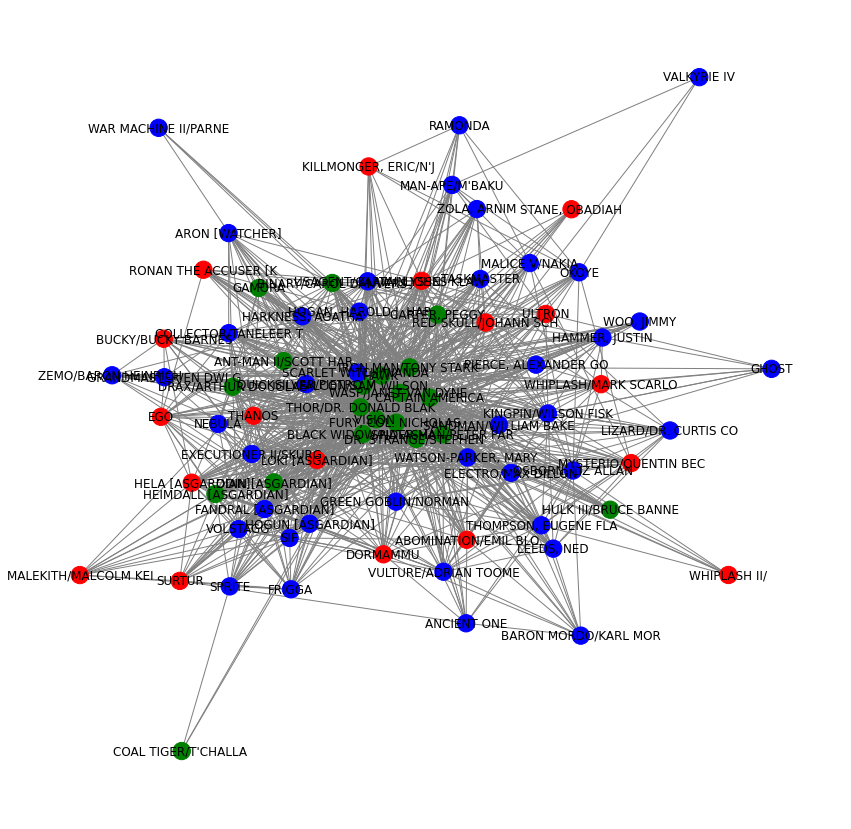

In [ ]:
graph_main_h = heros.subgraph(phase3_all)
fig,ax = plt.subplots(1,1,figsize = (15,15))
def color_func(x,main,main_v):
  if x in main:
    if x not in main_v:
      return 'green'
    else:
      return 'red'
  else:
    return 'blue'
node_colors = [color_func(v,phase3_main,phase3_main_vil) for v in cc_main_h[0]]
nx.draw(graph_main_h.subgraph(list(cc_main_h[0])),with_labels=True,node_color=node_colors,edge_color='grey',ax = ax)

In [ ]:
phase4 = nx.from_pandas_edgelist(hero_hero_edges, source = "hero1", target = "hero2")
phase4.remove_edges_from(nx.selfloop_edges(phase4))
phase4.remove_nodes_from(dead_characters)

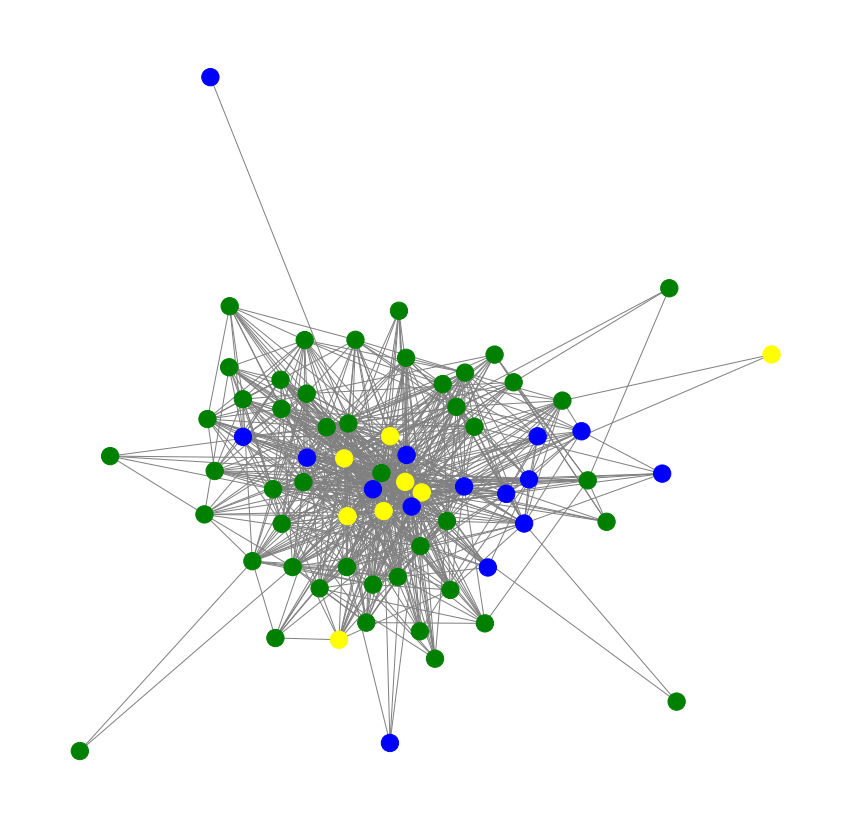

In [ ]:
phase34 = [i for i in list(set(phase3_all + phase4_main)) if i not in dead_characters]
cc34_main = sorted(nx.connected_components(heros.subgraph(phase34)), key=len,reverse = True)
fig,ax = plt.subplots(1,1,figsize = (15,15))
def color_func(x,phase4,phase3):
  if x not in phase4:
    return 'green'
  else:
    if x in phase3:
      return 'yellow'
    else:
      return 'blue'
node_colors = [color_func(v,phase4_main,phase3_all) for v in cc34_main[0]]
nx.draw(phase4.subgraph(list(cc34_main[0])),with_labels=False,node_color=node_colors,edge_color='grey',ax = ax)

In [ ]:
nx.info(phase4)

'Graph with 6385 nodes and 157014 edges'

In [ ]:
np.min([v for (k,v) in heros.degree(phase3_all)]),np.average([v for (k,v) in heros.degree(phase3_all)]),np.max([v for (k,v) in heros.degree(phase3_all)])

(6, 355.5833333333333, 1906)

In [ ]:
nei_main4 = []
for i in phase4_main:
  nei_main4.append([j for j in phase4.neighbors(i) if heros.degree(j) >= np.average([v for (k,v) in heros.degree(phase3_all)])])

In [ ]:
hop1 = []
for i in nei_main4:
  for j in i:
    if j not in hop1:
      hop1.append(j)
len(hop1)

128

In [ ]:
future = list(set(hop1).difference(set(phase3_all + phase4_main)))
confirmed = ['BLACK KNIGHT V/DANE ','HUMAN TORCH/JOHNNY S','THING/BENJAMIN J. GR','PARKER, MAY','MR. FANTASTIC/REED R','SILVER SURFER/NORRIN','DR. DOOM/VICTOR VON ',
             'INVISIBLE WOMAN/SUE ''SPIDER-WOMAN II/JULI','PARKER, MAY']
rumored = ['HERCULES [GREEK GOD]','GALACTUS/GALAN','PROFESSOR X/CHARLES ','MYSTIQUE/RAVEN DARKH','WOLVERINE/LOGAN ','MAGNETO/MAGNUS/ERIC ','STORM/ORORO MUNROE S',
           'CYCLOPS/SCOTT SUMMER','ROGUE /']
present = ['ANT-MAN/DR. HENRY J.','HULK/DR. ROBERT BRUC',"BLACK PANTHER/T'CHAL"]

len(confirmed + present)/len(future),len(rumored)/len(future)

(0.11320754716981132, 0.08490566037735849)

### Link Prediction to predict new movie co-appearances.

In [ ]:
nodes_for_phase4 = ['KINGO SUNEN [ETERNAL','MAKKARI/MIKE KHARY/I','DRUIG','SPRITE','SERSI/SYLVIA','THENA','PHASTOS [ETERNAL]','ARISHEM [CELESTIAL]','BLACK KNIGHT V/DANE ',
                    'HAWK','BLACK WIDOW II/YELEN','ECHO/MAYA LOPEZ','CLOWN/CRAFTY ELIOT F','MS. MARVEL II/SHARON','DR. STRANGE/STEPHEN ','SPIDER-MAN/PETER PAR',
                    'WONG','HOGAN, HAROLD J. HAP','DR. OCTOPUS/OTTO OCT','ELECTRO/MAX DILLON','THOMPSON, EUGENE FLA','MOON KNIGHT/MARC SPE','SHE-HULK/JENNIFER WA',
                    'HULK III/BRUCE BANNE','ABOMINATION/EMIL BLO','FURY, COL. NICHOLAS ','TALOS','SCARLET WITCH/WANDA ','WONG','BARON MORDO/KARL MOR','THOR/DR. DONALD BLAK','VALKYRIE IV',
                    'ZEUS','SIF','DRAX/ARTHUR DOUGLAS','ROCKET RACCOON','NEBULA',"MAN-APE/M'BAKU",'MALICE V/NAKIA','OKOYE','ANT-MAN II/SCOTT HAR',
                    'WASP/JANET VAN DYNE ','BINARY/CAROL DANVERS']

eternals = ['KINGO SUNEN [ETERNAL','MAKKARI/MIKE KHARY/I','DRUIG','SPRITE','SERSI/SYLVIA','THENA','PHASTOS [ETERNAL]','ARISHEM [CELESTIAL]','BLACK KNIGHT V/DANE ']
hawkeye = ['HAWK','BLACK WIDOW II/YELEN','ECHO/MAYA LOPEZ','CLOWN/CRAFTY ELIOT F']
no_way = ['DR. STRANGE/STEPHEN ','SPIDER-MAN/PETER PAR','WONG','HOGAN, HAROLD J. HAP','THOMPSON, EUGENE FLA']
she_hulk = ['SHE-HULK/JENNIFER WA','HULK III/BRUCE BANNE']
secret = ['FURY, COL. NICHOLAS ','TALOS']
madness = ['SCARLET WITCH/WANDA ','WONG','BARON MORDO/KARL MOR','DR. STRANGE/STEPHEN ']
thor = ['THOR/DR. DONALD BLAK','VALKYRIE IV','ZEUS','SIF','DRAX/ARTHUR DOUGLAS','ROCKET RACCOON','NEBULA']
wakanda = ['MALICE V/NAKIA','OKOYE']
marvels = ['MS. MARVEL II/SHARON','FURY, COL. NICHOLAS ','BINARY/CAROL DANVERS']
ant = ['ANT-MAN II/SCOTT HAR','WASP/JANET VAN DYNE ']
galaxy = ['DRAX/ARTHUR DOUGLAS','ROCKET RACCOON','NEBULA']
movie_list = [eternals,hawkeye,no_way,she_hulk,secret,madness,thor,wakanda,marvels,ant,galaxy]

import itertools

weighted_edges = []
for movie in movie_list:
  for i in itertools.combinations(movie,2):
    weighted_edges.append((i[0],i[1],heros.degree(i[0]) + heros.degree(i[1])))
weighted_edges = list(set(weighted_edges))


In [ ]:
phase4graph = nx.Graph()
phase4graph.add_weighted_edges_from(weighted_edges)

In [ ]:
weight_degree = list(phase4graph.degree(weight = 'weight'))
weight_d = {}
for i in weight_degree:
  weight_d[i[0]] = i[1]

In [ ]:
preferential_att = []
for i in itertools.combinations(list(phase4graph.nodes),2):
  if set([i[0],i[1]]) not in [set([i[0],i[1]]) for i in list(phase4graph.edges)]:
    preferential_att.append((i[0],i[1],weight_d[i[0]]*weight_d[i[1]]))

In [ ]:
for i in sorted(preferential_att,key = lambda x: x[2],reverse = True):
  print(i,end = " ")
  print("||",end = " ")

('DR. STRANGE/STEPHEN ', 'THOR/DR. DONALD BLAK', 93326008) || ('SPIDER-MAN/PETER PAR', 'THOR/DR. DONALD BLAK', 79735099) || ('DR. STRANGE/STEPHEN ', 'BLACK KNIGHT V/DANE ', 79291704) || ('SPIDER-MAN/PETER PAR', 'BLACK KNIGHT V/DANE ', 67744587) || ('DR. STRANGE/STEPHEN ', 'SERSI/SYLVIA', 67455544) || ('BLACK KNIGHT V/DANE ', 'THOR/DR. DONALD BLAK', 66258993) || ('WONG', 'THOR/DR. DONALD BLAK', 65817443) || ('SPIDER-MAN/PETER PAR', 'SERSI/SYLVIA', 57632107) || ('SERSI/SYLVIA', 'THOR/DR. DONALD BLAK', 56368273) || ('WONG', 'BLACK KNIGHT V/DANE ', 55919859) || ('SPIDER-MAN/PETER PAR', 'SCARLET WITCH/WANDA ', 50345704) || ('SCARLET WITCH/WANDA ', 'THOR/DR. DONALD BLAK', 49241656) || ('WONG', 'SERSI/SYLVIA', 47572499) || ('MAKKARI/MIKE KHARY/I', 'DR. STRANGE/STEPHEN ', 46594312) || ('SIF', 'DR. STRANGE/STEPHEN ', 45294448) || ('THOMPSON, EUGENE FLA', 'THOR/DR. DONALD BLAK', 42962815) || ('BLACK KNIGHT V/DANE ', 'SCARLET WITCH/WANDA ', 41836728) || ('THENA', 'DR. STRANGE/STEPHEN ', 41711896)

In [ ]:
normalized_weights = []
total = np.sum([i[2] for i in preferential_att])
for i in preferential_att:
  normalized_weights.append((i[0],i[1],i[2]/total))

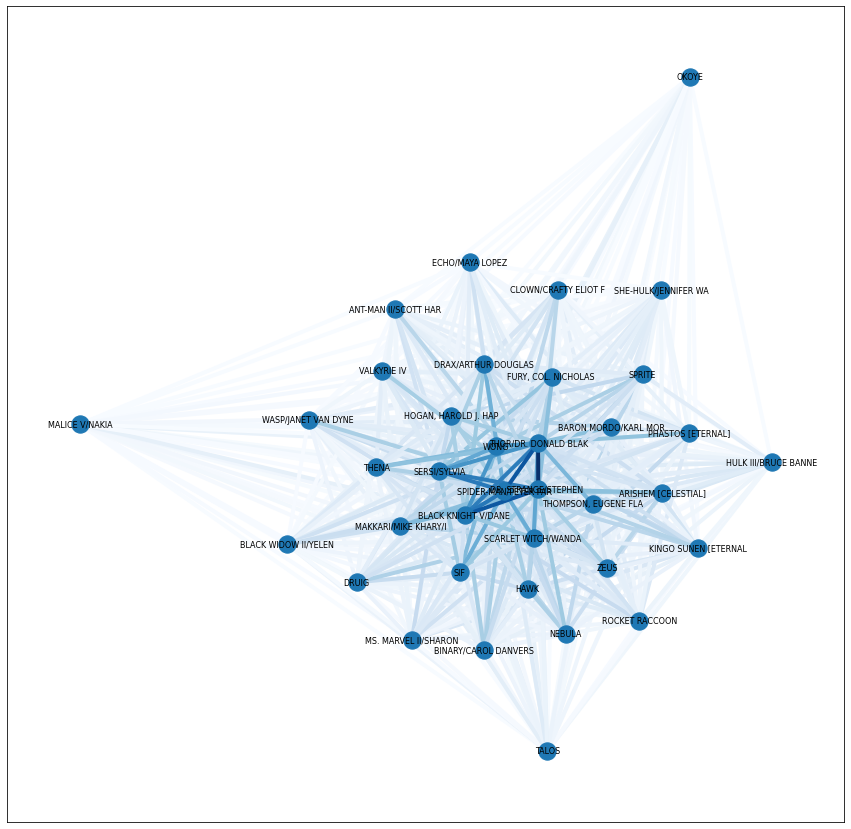

In [ ]:
phase4graph_new = nx.Graph()
phase4graph_new.add_weighted_edges_from(sorted(normalized_weights,key = lambda x: x[2]))
#phase4graph_new.add_weighted_edges_from(weighted_edges)

fig,ax = plt.subplots(1,1,figsize = (15,15))
pos = nx.spring_layout(phase4graph_new)
nx.draw_networkx_nodes(phase4graph_new,pos = pos,ax = ax)
nx.draw_networkx_labels(phase4graph,pos = pos,font_size = 8)
edges,weights = zip(*nx.get_edge_attributes(phase4graph_new,'weight').items())

#nx.draw_networkx_edges(phase4graph,pos=pos,width = 1,edge_color='green')
nx.draw_networkx_edges(phase4graph_new,pos=pos,edgelist = sorted(normalized_weights,key = lambda x: x[2]),edge_color = weights,edge_cmap=plt.cm.Blues,width = 4)

#### Possible character co-appearances :

Looking at the list of predicted links by the preferential attachement models we list down the 7 most probable interactions in the future:



1.   Dr.Strange + Thor
2.   Spider-Man + Thor
3.   Eternals + Dr.Strange/Spider-Man
4.   Spider-Man + Wanda
5.   Eternals + Thor
6.   Thor + Wanda
7.   Hawk + Dr.Strange/Spider-Man

